In [1]:
import copy

import prody
from rdkit import Chem
from rdkit.Chem import Draw

from rgroup import rep2D, draw3D, draw3Dcons, merge_R_group, tox_props, Mol, generate_conformers

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
# load the complex with the ligand
sys = prody.parsePDB('5NEV.pdb1')
rec = sys.select('not (nucleic or hetatm) and not water')
mol = sys.select('resname 72L')

prody.writePDB('rec.pdb', rec)
prody.writePDB('lig.pdb', mol)

@> 4485 atoms and 1 coordinate set(s) were parsed in 0.04s.


'lig.pdb'

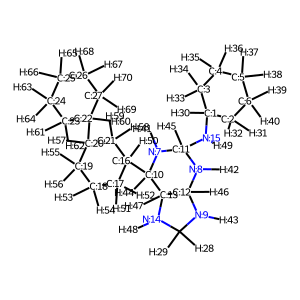

In [3]:
# load the ligand
init_mol = Chem.MolFromPDBFile('lig_nos.pdb')
init_mol = Chem.AddHs(init_mol, addCoords=True)

# select the atom to be replaced with the R group
Draw.MolToImage(rep2D(init_mol))

In [4]:
# load the R group
R_group = Chem.MolFromMolFile('data/rgroups/molecules/alcohols/methanol-r.mol', removeHs=False)
draw3D(init_mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
mol = merge_R_group(init_mol, R_group, 37)
draw3D(mol)

Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7fe775a67e90> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7fe775a67da0>


RuntimeError: Range Error
	idx
	Violation occurred on line 198 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 75 < 71
	RDKIT: 2021.03.5
	BOOST: 1_74


In [ ]:
Draw.MolToImage(rep2D(mol, idx=False))

In [ ]:
toxicity = tox_props(mol)
toxicity

In [ ]:
# visualise the template
draw3D(mol.template)

In [ ]:
draw3D(mol)

In [ ]:
cons = generate_conformers(mol, mol.template, num_conf=20, minimum_conf_rms=0.5)

In [ ]:
draw3Dcons(cons)

In [ ]:
cons.GetNumConformers()